# Lesson 19 - Support Vector Machines (Part 2)

### Additional Resources
* Hands-On Machine Learning, Ch 5
* RBF Kernel is in chapter 5 on page 160


In [13]:
import numpy as np
import matplotlib.pyplot as plt

 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import *

from ClassificationPlotter import plot_regions
from ipywidgets import *

import warnings
warnings.filterwarnings('ignore')


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Determining Features Based on the Radial Basis Function



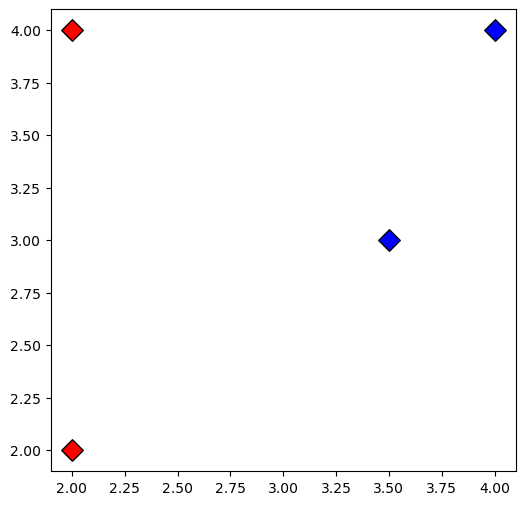

In [14]:
# plotting just 4 points....
L1 = np.array([2,2])
L2 = np.array([4,4])
L3 = np.array([2,4])
L4 = np.array([3.5,3])

plt.figure(figsize = [6,6])
plt.scatter(L1[0], L1[1], c='red', s=120, edgecolor='k', marker='D')
plt.scatter(L2[0], L2[1], c='blue', s=120, edgecolor='k', marker='D')
plt.scatter(L3[0], L3[1], c='red', s=120, edgecolor='k', marker='D')
plt.scatter(L4[0], L4[1], c='blue', s=120, edgecolor='k', marker='D')
plt.show()

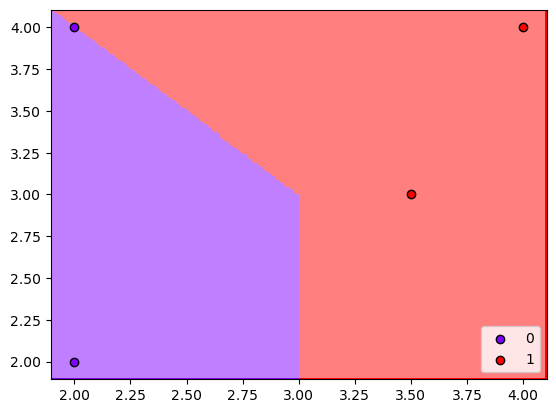

In [15]:
# Experiment with different values of K and p

X= np.vstack([L1, L2, L3, L4])
y = np.hstack( [ [0], [1], [0], [1] ])

mod = KNeighborsClassifier(n_neighbors=3, p=2)
mod.fit(X,y)

plot_regions(mod, X, y, num_ticks=200)

Let `L` denote a "landmark" point. for a given observation $x_i$, we defined a new transformed feature `z` as follows: $\large z = e^{-\gamma \cdot d(L, x_i)^2}$.  The transformation is a bell shaped function varying from 0 (very far from the landmark) to  1 (at the landmark).   

If we have several landmarks, $L_1, L_2, ..., L_k$, then each landmark will determine a new feature, $z_1, z_2, ..., z_k$ in the transformed space. 

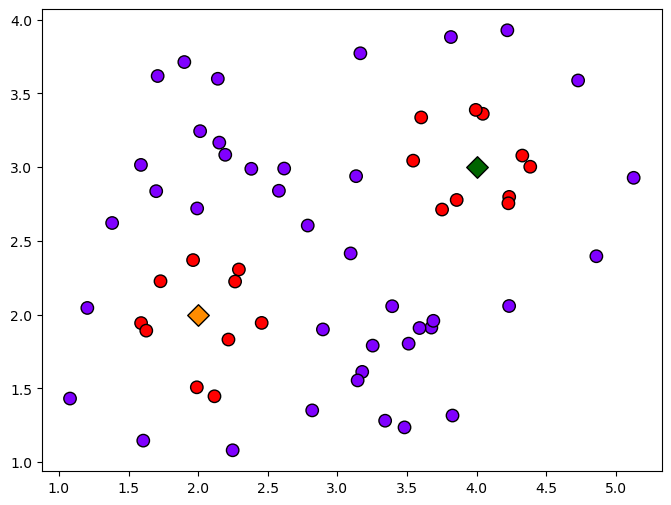

In [16]:
#plotting a whole bunch of points!!
np.random.seed(1)

L1 = np.array([2,2])
L2 = np.array([4,3])
L = np.vstack([L1,L2])

X1a, y1a = make_circles(n_samples=20, noise=0.1, factor=0.4)
X1b, y1b = make_circles(n_samples=20, noise=0.1, factor=0.4)
X1c, y1c = make_blobs(n_samples=10, centers=1, cluster_std=0.3)
X1d, y1d = make_blobs(n_samples=10, centers=1, cluster_std=0.3)

#X1a, y1a = make_circles(n_samples=20, noise=0.1, factor=0.4)
#X1b, y1b = make_circles(n_samples=20, noise=0.1, factor=0.4)
#X1c, y1c = make_blobs(n_samples=10, centers=1, cluster_std=0.1)
#X1d, y1d = make_blobs(n_samples=10, centers=1, cluster_std=0.1)
                                    

X1a = X1a + L1
X1b = X1b + L2
X1c = X1c + np.array([6.5,8.5])
X1d = X1d + np.array([7.5,7.5])

X1 = np.vstack([X1a, X1b, X1c, X1d])
y1 = np.hstack([y1a, y1b, y1c, y1d])



plt.figure(figsize = [8,6])
plt.scatter(X1[:, 0], X1[:, 1],  c=y1, s=80, edgecolor='k', cmap='rainbow')
plt.scatter(L1[0], L1[1], c='darkorange', s=120, edgecolor='k', marker='D')
plt.scatter(L2[0], L2[1], c='darkgreen', s=120, edgecolor='k', marker='D')
plt.show()

In [17]:
%run -i Snippets/snippet13.py

## Using Radial Basis Functions with Support Vector Machines

When using radial basis functions to create a higher dimensional feature space for linear classification, we will use each point in the training set as a separate landmark. The resulting transformed feature space will have `n` dimensions, where `n` is the number of training observations. 

## Example 1

In [18]:
%run -i Snippets/snippet14.py

In [19]:
mod_01 = SVC(kernel='rbf', C=20, gamma=0.5)
mod_01.fit(X1, y1)
print('Training Accuracy:', mod_01.score(X1, y1))

Training Accuracy: 1.0


## Example 2

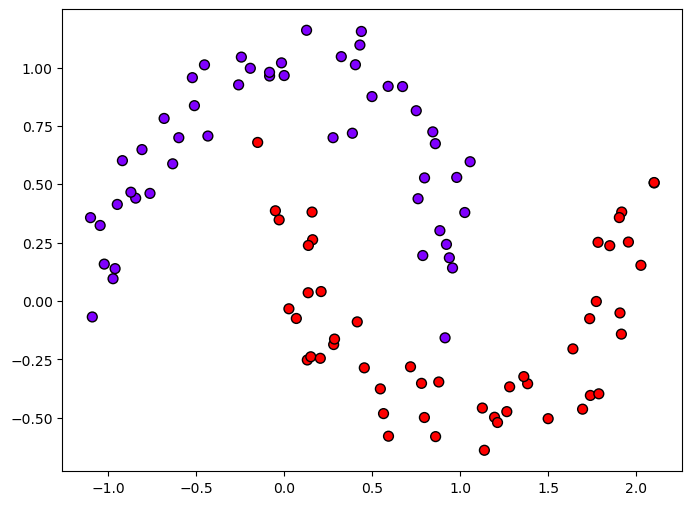

In [20]:
np.random.seed(159)
X2, y2 = make_moons(n_samples=100, noise=0.1)

plt.figure(figsize = [8,6])
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [21]:
%run -i Snippets/snippet15.py

In [22]:
mod_02 = SVC(kernel='rbf', C=20, gamma=1.6)
mod_02.fit(X2, y2)
print('Training Accuracy:', mod_02.score(X2, y2))

Training Accuracy: 1.0


## Example 3

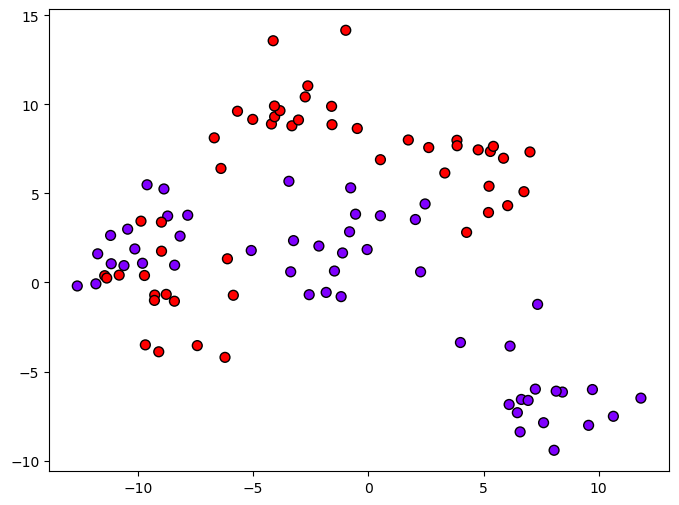

In [23]:
np.random.seed(7530)
X3, y3 = make_blobs(n_samples=100, centers=6, n_features=2, cluster_std=2)
y3 = np.where(y3%2 == 0, 0, np.where(y3%2 == 1, 1, y3))


plt.figure(figsize = [8,6])
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=y3, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [24]:
%run -i Snippets/snippet16.py